<a href="https://colab.research.google.com/github/safaltasaxena/deep-learning-mini-projects/blob/main/image-classification-CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification using CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#reshaping from 2d to 1d
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[9]

'truck'

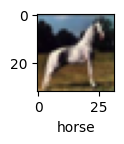

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,1))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
plot_sample(x_train,y_train,68)

In [ ]:
#normalising the data
x_train=x_train/255.0
x_test=x_test/255.0

first we will build a simple artifical neural network

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
#sigmoid can give likely proba for like 2 classes thus no op thus softmax that gives relative proba so that max can be found out.
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            #with sparse use softmax cz this means proba distribuition.
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.3072 - loss: 1.9336
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.4195 - loss: 1.6472
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.4536 - loss: 1.5496
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 79ms/step - accuracy: 0.4731 - loss: 1.4912
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 82ms/step - accuracy: 0.4946 - loss: 1.4408


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.26      0.39      1000
           1       0.69      0.41      0.52      1000
           2       0.37      0.20      0.26      1000
           3       0.46      0.08      0.13      1000
           4       0.43      0.40      0.41      1000
           5       0.34      0.46      0.39      1000
           6       0.62      0.39      0.48      1000
           7       0.26      0.83      0.40      1000
           8       0.77      0.39      0.52      1000
           9       0.41      0.72      0.52      1000

    accuracy                           0.41     10000
   macro avg       0.51      0.41      0.40     10000
weighted avg       0.51      0.41      0.40     10000



now we will use CNN

In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #another set of cnn layer
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.3589 - loss: 1.7546
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.5773 - loss: 1.1997
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6424 - loss: 1.0190
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6786 - loss: 0.9215
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7012 - loss: 0.8578
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.7240 - loss: 0.8010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7363 - loss: 0.7521
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7489 - loss: 0.7138
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7653 - loss: 0.6742
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.7836 - loss: 0.6325


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6928 - loss: 0.9320


[0.9294716715812683, 0.6935999989509583]

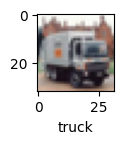

In [ ]:
y_test=y_test.reshape(-1,)
plot_sample(x_test,y_test,11)

In [ ]:
classes[y_classes[11]]

'truck'

In [ ]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


array([[7.1258401e-04, 2.9133822e-04, 1.2222556e-03, 8.1580949e-01,
        2.6266254e-03, 1.5402816e-01, 2.4135644e-02, 1.1090595e-04,
        3.5552238e-04, 7.0753373e-04],
       [2.7543891e-04, 2.4731222e-03, 1.9641429e-06, 4.8068347e-07,
        5.9567178e-08, 2.4223831e-10, 3.4029423e-08, 1.1318377e-08,
        9.9722934e-01, 1.9651932e-05],
       [6.7967594e-02, 1.0293034e-01, 1.5890008e-03, 3.0344961e-02,
        4.7774110e-03, 2.7091647e-03, 8.0619007e-04, 5.7047484e-03,
        7.7333933e-01, 9.8312311e-03],
       [8.1000346e-01, 3.0774476e-03, 9.8402262e-02, 5.4002726e-03,
        2.3189886e-02, 4.6171842e-04, 3.5082665e-04, 4.0692819e-04,
        5.8672786e-02, 3.4404595e-05],
       [5.9176458e-05, 2.8828095e-05, 2.3121418e-02, 1.3425572e-01,
        6.2043971e-01, 1.6423905e-02, 2.0559724e-01, 5.0945500e-06,
        6.4227963e-05, 4.6809191e-06]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
print("classification report: \n",classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.74      1000
           1       0.81      0.82      0.82      1000
           2       0.73      0.45      0.56      1000
           3       0.46      0.58      0.51      1000
           4       0.63      0.63      0.63      1000
           5       0.56      0.65      0.60      1000
           6       0.84      0.70      0.77      1000
           7       0.69      0.79      0.74      1000
           8       0.84      0.79      0.82      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000

